# Project 1: Would it take longer?

## Background

> **Tip**: Make sure to run each of the cells in order :)

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='red'>RED</font> , <font color="blue">BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color="green">PURPLE</font>, <font color="purple">ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

> Lets start with importing all the necessary packages!

In [1]:
#Import all necessary packages 
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
from scipy import stats

> I wonder how the data looks...

In [2]:
#Take a look at the data
sample_data = pd.read_csv('stroopdata.csv')
display(sample_data.head())

Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803

# 1. What is our independent variable? What is our dependent variable?
	
    Independent: Congruent or Incongruent
	Dependent: Time to name the ink colors
    

# 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
	
    Hypotheses: 
		Null: Ho: (Avg Time Incongruent) - (Avg. Time Congruent) <= 0
			On average, incongruent words take less than or equal time to read than congruent words
		Alternative: Ha: (Avg Time Incongruent) - (Avg. Time Congruent) > 0
			On average, incongruent words take longer to read than congruent words
            
	Statistical Test: Dependent t-test for paired samples given that:
		- We don't know the population
		- Each subject names a congruent and an incongruent list

# 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

See results below

In [92]:
#Compute Mean
print("Mean:")
print (np.mean(sample_data))

print()
#Compute Standard Deviation
print("Standard Deviation:")
print(np.std(sample_data))

Mean:
Congruent      14.051125
Incongruent    22.015917
dtype: float64

Standard Deviation:
Congruent      3.484416
Incongruent    4.696055
dtype: float64


# 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

See commentary below each chart

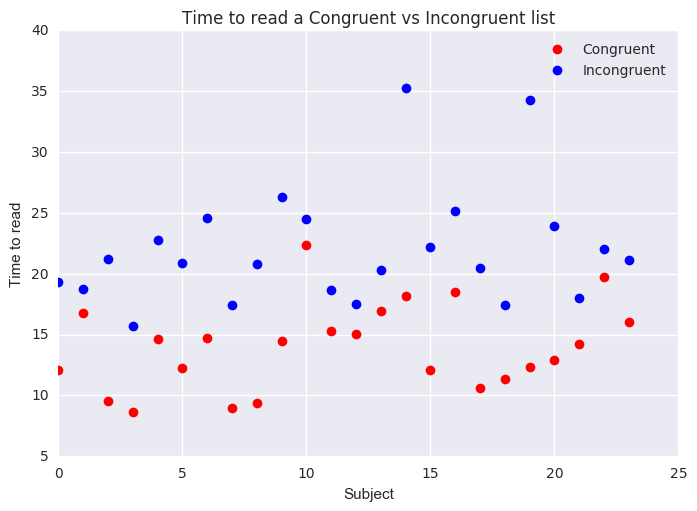

In [80]:
#Plot time to read a Congruent vs and Incongruent list
line1, = plt.plot(sample_data['Congruent'],'ro', label='Congruent')
line2, = plt.plot(sample_data['Incongruent'],'bo', label='Incongruent')

plt.legend()
plt.title('Time to read a Congruent vs Incongruent list')
plt.xlabel('Subject')
plt.ylabel('Time to read')
plt.show()

> Interestingly, the time to read Incongruent lists of words (blue dots) is consistently higher than the time to read Congruent lists of words (red dots)

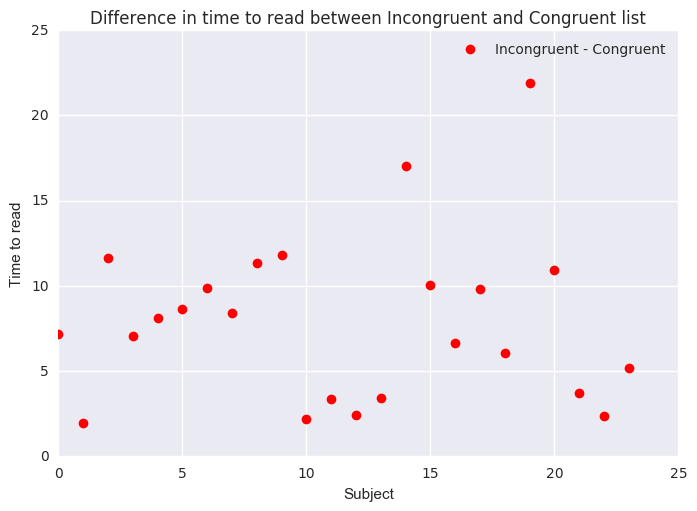

In [81]:
#Plot difference in time to read between Incongruent and Congruent list
line1, = plt.plot(sample_data['Incongruent'] - sample_data['Congruent'],'ro', label='Incongruent - Congruent')

plt.legend()
plt.title('Difference in time to read between Incongruent and Congruent list')
plt.xlabel('Subject')
plt.ylabel('Time to read')
plt.show()

> Also, on a subject-by-subject basis, all subjects took longer to read a ist of Incongruent words relative to a list of Congruent words

# 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

See below

In [98]:
#Dependent t-test for paired samples
print('Critical t-statistic and p-value:')
stats.ttest_1samp(sample_data['Incongruent'] - sample_data['Congruent'], 0)

Critical t-statistic and p-value:


Ttest_1sampResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

In [96]:
n = len(sample_data)
print("Confidence Level:")
stats.t.cdf(x= 4.103,df=(n-1))

Confidence Level:


0.99978226476384968

> My Confidence Level is 99.97%

> I reject the null hypotheses

> The results matched with my expectations and with the preliminary charts. Indeed, reading an Incongruent list of words takes longer than reading a Congruent list of words

# Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think the subjects brain has to work harder to read the ink color when the meaning of the words and color do not match.

Therefore I think that if we had people read the words and the ink color was different we would see a similar reaction.